# Import Library

In [1]:
from keras.datasets import cifar10
import numpy as np
np.random.seed(10)

Using TensorFlow backend.


# 資料準備

In [2]:
#取得Keras Dataset
(x_img_train,y_label_train),(x_img_test,y_label_test)=cifar10.load_data()

In [3]:
#確認 CIFAR10 Dataset 資料維度
print("train data:",'images:',x_img_train.shape,
      " labels:",y_label_train.shape) 
print("test  data:",'images:',x_img_test.shape ,
      " labels:",y_label_test.shape) 

train data: images: (50000, 32, 32, 3)  labels: (50000, 1)
test  data: images: (10000, 32, 32, 3)  labels: (10000, 1)


In [4]:
#資料正規化
x_img_train_normalize = x_img_train.astype('float32') / 255.0
x_img_test_normalize = x_img_test.astype('float32') / 255.0

In [5]:
#針對Label 做 ONE HOT ENCODE
from keras.utils import np_utils
y_label_train_OneHot = np_utils.to_categorical(y_label_train)
y_label_test_OneHot = np_utils.to_categorical(y_label_test)
y_label_test_OneHot.shape

(10000, 10)

# 建立模型

In [6]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D, ZeroPadding2D

In [7]:
def create_model():
    model = Sequential()
    
    #卷積層1
    model.add(Conv2D(filters=32,kernel_size=(3,3),
                 input_shape=(32, 32,3), 
                 activation='relu', 
                 padding='same'))
    model.add(Dropout(rate=0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #卷積層2與池化層2
    model.add(Conv2D(filters=64, kernel_size=(3, 3), 
                 activation='relu', padding='same'))
    model.add(Dropout(0.25))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    
    #建立神經網路(平坦層、隱藏層、輸出層)
    model.add(Flatten())
    model.add(Dropout(rate=0.25))
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(rate=0.25))
    model.add(Dense(10, activation='softmax'))

    return model

In [8]:
model = create_model()

#檢查model 的STACK
print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
dropout_1 (Dropout)          (None, 32, 32, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
dropout_2 (Dropout)          (None, 16, 16, 64)        0         
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 8, 8, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 4096)              0         
__________

In [9]:
import matplotlib.pyplot as plt
def show_train_history(train_acc,test_acc):
    plt.plot(train_history.history[train_acc])
    plt.plot(train_history.history[test_acc])
    plt.title('Train History')
    plt.ylabel('Accuracy' if train_acc == 'acc' else train_acc)
    plt.xlabel('Epoch')
    plt.legend(['train', 'test'], loc='upper left')
    plt.show()

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 162s 4ms/step - loss: 1.7995 - acc: 0.3502 - val_loss: 1.6279 - val_acc: 0.4483
Epoch 2/10
40000/40000 [==============================] - 159s 4ms/step - loss: 1.4647 - acc: 0.4748 - val_loss: 1.4977 - val_acc: 0.5056
Epoch 3/10
40000/40000 [==============================] - 156s 4ms/step - loss: 1.3156 - acc: 0.5268 - val_loss: 1.3376 - val_acc: 0.5589
Epoch 4/10
40000/40000 [==============================] - 163s 4ms/step - loss: 1.2097 - acc: 0.5695 - val_loss: 1.2275 - val_acc: 0.6010
Epoch 5/10
40000/40000 [==============================] - 158s 4ms/step - loss: 1.1265 - acc: 0.5993 - val_loss: 1.1744 - val_acc: 0.6063
Epoch 6/10
40000/40000 [==============================] - 163s 4ms/step - loss: 1.0490 - acc: 0.6307 - val_loss: 1.1344 - val_acc: 0.6308
Epoch 7/10
40000/40000 [==============================] - 176s 4ms/step - loss: 0.9892 - acc: 0.6484 - val_loss: 1.0627 - 

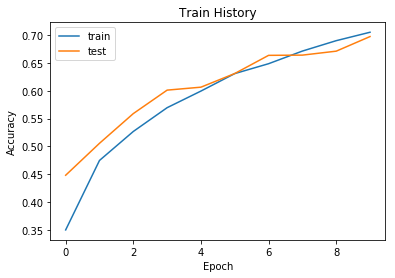

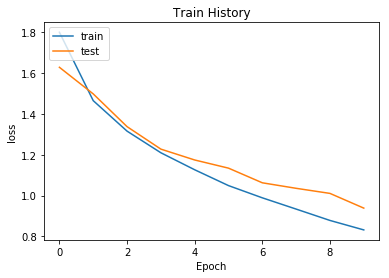

10000/10000 [==============================] - 6s 623us/step

accuracy= 0.6926


In [10]:
model = create_model()
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1) 

show_train_history('acc','val_acc')

show_train_history('loss','val_loss')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

score_0 = scores[1]

ref:  
[Sequential.fit()](https://keras.io/models/sequential/#fit)  
[Training history visualization](https://keras.io/visualization/)

# 載入之前訓練的模型

In [11]:
try:
    model.load_weights("SaveModel/cifarCnnModel.h5")
    print("載入模型成功!繼續訓練模型")
except :    
    print("載入模型失敗!開始訓練一個新模型")

載入模型失敗!開始訓練一個新模型


# 訓練模型

# 作業: 
    請分別選用 "MSE", "binary _crossentropy"
    查看Train/test accurancy and loss rate

### Loss function : MSE

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 165s 4ms/step - loss: 0.0898 - acc: 0.1253 - val_loss: 0.0894 - val_acc: 0.1960
Epoch 2/10
40000/40000 [==============================] - 174s 4ms/step - loss: 0.0890 - acc: 0.1639 - val_loss: 0.0887 - val_acc: 0.2345
Epoch 3/10
40000/40000 [==============================] - 164s 4ms/step - loss: 0.0879 - acc: 0.1949 - val_loss: 0.0877 - val_acc: 0.2570
Epoch 4/10
40000/40000 [==============================] - 167s 4ms/step - loss: 0.0863 - acc: 0.2279 - val_loss: 0.0861 - val_acc: 0.2802
Epoch 5/10
40000/40000 [==============================] - 162s 4ms/step - loss: 0.0842 - acc: 0.2636 - val_loss: 0.0844 - val_acc: 0.3121
Epoch 6/10
40000/40000 [==============================] - 158s 4ms/step - loss: 0.0824 - acc: 0.2936 - val_loss: 0.0830 - val_acc: 0.3309
Epoch 7/10
40000/40000 [==============================] - 160s 4ms/step - loss: 0.0810 - acc: 0.3138 - val_loss: 0.0818 - 

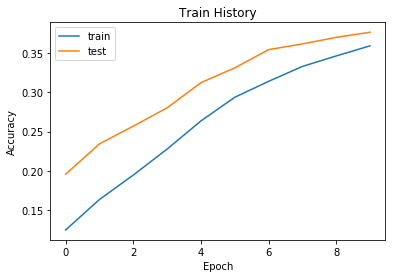

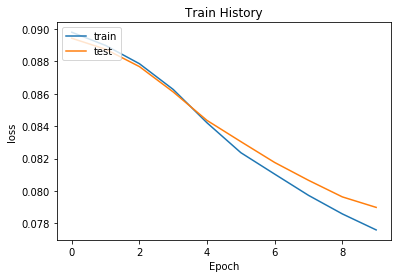

10000/10000 [==============================] - 8s 842us/step

accuracy= 0.3918


In [12]:
model = create_model()
model.compile(loss='mean_squared_error', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1) 

show_train_history('acc','val_acc')

show_train_history('loss','val_loss')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

score_1 = scores[1]

### Loss function : binary _crossentropy

Train on 40000 samples, validate on 10000 samples
Epoch 1/10
40000/40000 [==============================] - 184s 5ms/step - loss: 0.3118 - acc: 0.9001 - val_loss: 0.2978 - val_acc: 0.9000
Epoch 2/10
40000/40000 [==============================] - 170s 4ms/step - loss: 0.2850 - acc: 0.9010 - val_loss: 0.2820 - val_acc: 0.9002
Epoch 3/10
40000/40000 [==============================] - 177s 4ms/step - loss: 0.2693 - acc: 0.9024 - val_loss: 0.2698 - val_acc: 0.9004
Epoch 4/10
40000/40000 [==============================] - 173s 4ms/step - loss: 0.2556 - acc: 0.9048 - val_loss: 0.2570 - val_acc: 0.9015
Epoch 5/10
40000/40000 [==============================] - 175s 4ms/step - loss: 0.2455 - acc: 0.9070 - val_loss: 0.2486 - val_acc: 0.9032
Epoch 6/10
40000/40000 [==============================] - 176s 4ms/step - loss: 0.2374 - acc: 0.9090 - val_loss: 0.2437 - val_acc: 0.9039
Epoch 7/10
40000/40000 [==============================] - 170s 4ms/step - loss: 0.2310 - acc: 0.9111 - val_loss: 0.2365 - 

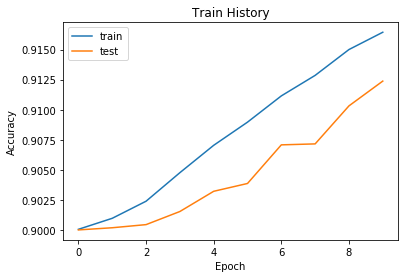

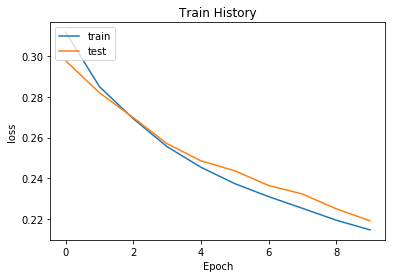

10000/10000 [==============================] - 6s 606us/step

accuracy= 0.9128100267410278


In [14]:
model = create_model()
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

train_history=model.fit(x_img_train_normalize, y_label_train_OneHot,
                        validation_split=0.2,
                        epochs=10, batch_size=16, verbose=1) 

show_train_history('acc','val_acc')

show_train_history('loss','val_loss')

scores = model.evaluate(x_img_test_normalize, y_label_test_OneHot)
print()
print('accuracy=',scores[1])

score_2 = scores[1]

In [18]:
print(f"Test dataset Accuracy:\n{'categorical_crossentropy':40s}:{score_0:.5f}\n{'mean_squared_error':40s}:{score_1:.5f}\n{'binary_crossentropy':40s}:{score_2:.5f}")

Test dataset Accuracy:
categorical_crossentropy                :0.69260
mean_squared_error                      :0.39180
binary_crossentropy                     :0.91281
